## Richardson Extrapolation: Gravitational wave polarization states


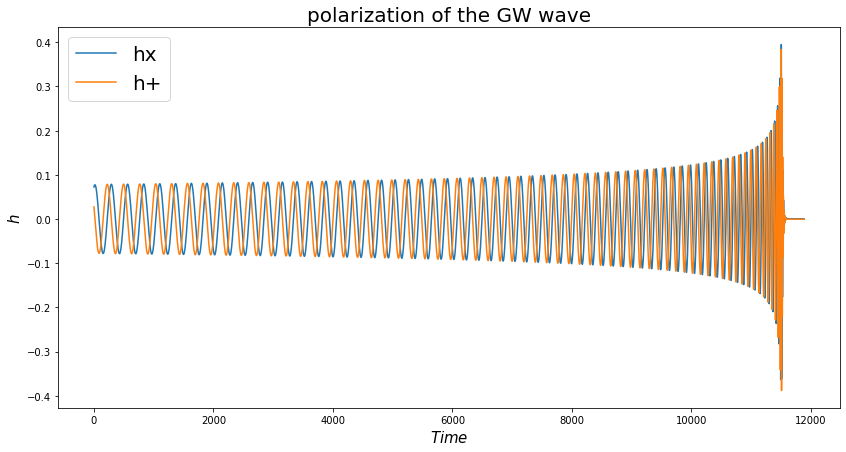

In [247]:
#loading data

figure(figsize=(14,7))

from pylab import *
#reading GW data 
fl=open("NRhData_SpEC_q1.00_spin1[0.00,-0.00,0.00]_spin2[0.00,0.00,0.00]_omega01.13e-02_l2_m2.dat","r")

lines=fl.readlines()
time=[]
h_plus=[]
h_cross=[]

for x in lines:
    time.append(float(x.split()[0])) 
    h_plus.append(float(x.split()[1])) 
    h_cross.append(float(x.split()[2]))
fl.close()

#else we could use the following to load data into the notebook
#h=loadtxt('/home/uddeepta/Desktop/ICTS/project_GW/computation/NRhData_SpEC_q1.00_spin1[0.00,-0.00,0.00]_spin2[0.00,0.00,0.00]_omega01.13e-02_l2_m2.dat')
#t=h[:,0]
#hx=h[:,1]    
#hy=h[:,2]
#h_cross=array(hx)
#h_plus=array(hy)

#plotting the polarizations
title('polarization of the GW wave',fontsize=20)
plot(time,h_cross,label='hx')
plot(time,h_plus,label='h+')
xlabel('$Time$',fontsize=15)
ylabel('$h$',fontsize=15)
legend(loc='upper left',fontsize=20)

Text(0, 0.5, '$\\phi(t)$')

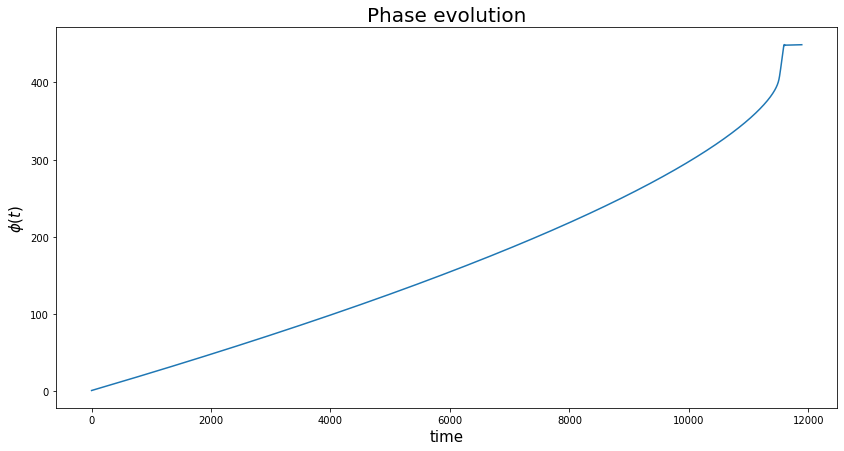

In [246]:
#the phase evolution \phi(t):
figure(figsize=(14,7))
phi=arctan2(h_cross,h_plus)
phi=unwrap(phi)
title('Phase evolution',fontsize=20)
plot(time,phi)
xlabel('time',fontsize=15)
ylabel('$\phi(t)$',fontsize=15)

Text(0.5, 0, 'time')

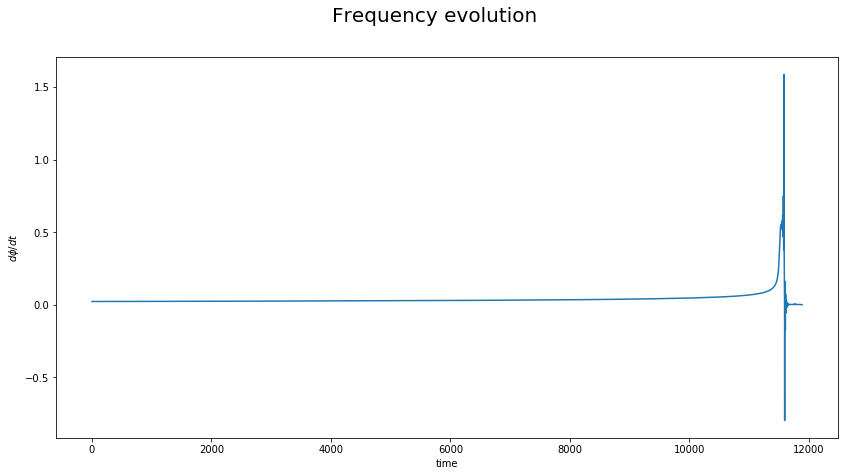

In [185]:
#the frequency evolution d\phi /dt ,and rate of change of frequency d^2\phi /dt^2 using central difference:
figure(figsize=(14,7))

DPhi=[]    #numerical value of differentiation
DDPhi=[]  #rate of change of frequency
h=time[1]-time[0]
DPhi=(phi[2:]-phi[:-2])/(2.0*h)
#DPhi.append((phi[i+1]-phi[i-1])/(2.0*h))
DDPhi=(phi[2:]+phi[:-2]-2*phi[1:-1])/(h*h)
suptitle('Frequency evolution',fontsize=20)
plot(time[1:-1],DPhi)
ylabel('$d\phi/dt$')
xlabel('time')

Text(0, 0.5, '$d^2\\phi/dt^2$')

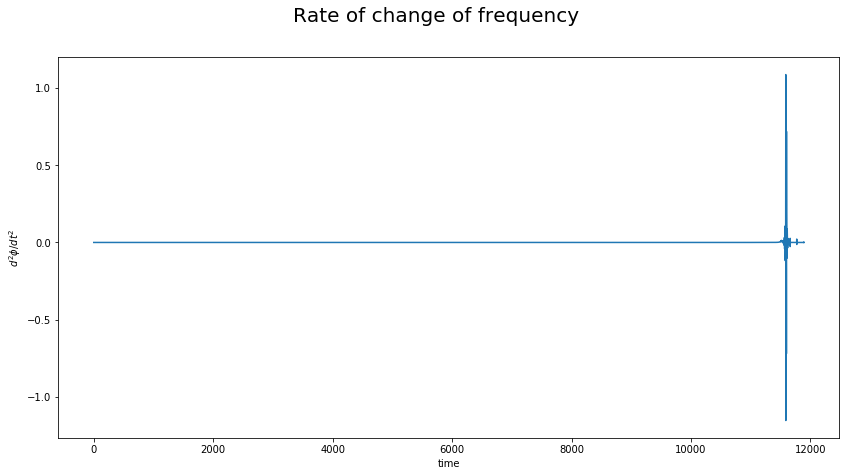

In [186]:
figure(figsize=(14,7))
suptitle('Rate of change of frequency',fontsize=20)
plot(time[1:-1],DDPhi)
xlabel('time')
ylabel('$d^2\phi/dt^2$')

## To estimate the order of convergence of the numerical computation of $\omega$ and $\dot{\omega}$

/home/uddeepta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log2


Text(0, 0.5, '$n(x)$')

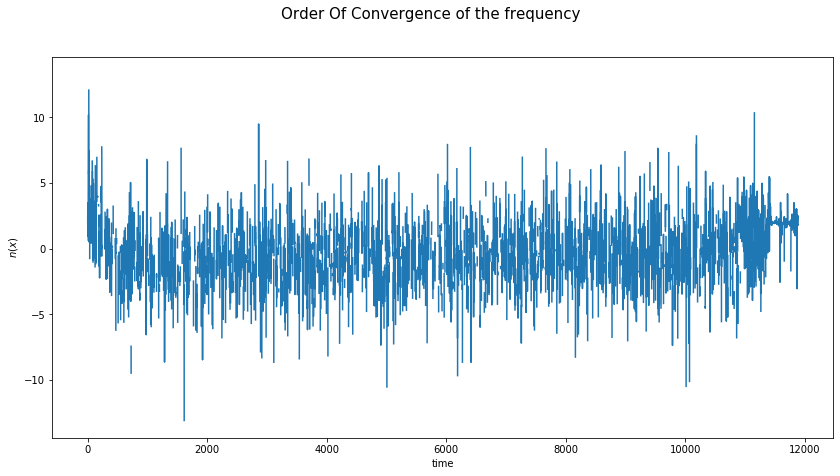

In [244]:
#order of convergence for $\omega$

h=loadtxt('/home/uddeepta/Desktop/ICTS/project_GW/computation/NRhData_SpEC_q1.00_spin1[0.00,-0.00,0.00]_spin2[0.00,0.00,0.00]_omega01.13e-02_l2_m2.dat')
t=h[:,0]
hy=h[:,1]    
hx=h[:,2]
time=array(t)
h_cross=array(hx)
h_plus=array(hy)

h1=time[1]-time[0]
h2=2.0*h1
h3=4.0*h1
t_min=min(time)
t_max=max(time)
phi2=phi[::2]
phi3=phi[::4]
time3=time[3::4]
time2=time[1::2]

figure(figsize=(14,7))
x1=arange(t_min,t_max,h1)
x2=arange(x_min,x_max,h2)
x3=arange(x_min,x_max,h3)

#central differencing
def fc(p,h):
    return ((p[2:]-p[:-2])/(2.0*h))
    
dc1=fc(phi,h1)[3::4]
dc2=fc(phi2,h2)[1::2]
dc3=fc(phi3,h3)
nc = log2((dc3 - dc2)/(dc2 - dc1[:-1]))
plot(time3[:-1],nc,label='central')
suptitle('Order Of Convergence of the frequency',fontsize=15)
xlabel('time')
ylabel('$n(x)$')

/home/uddeepta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log2
  if __name__ == '__main__':


Text(0, 0.5, '$n(x)$')

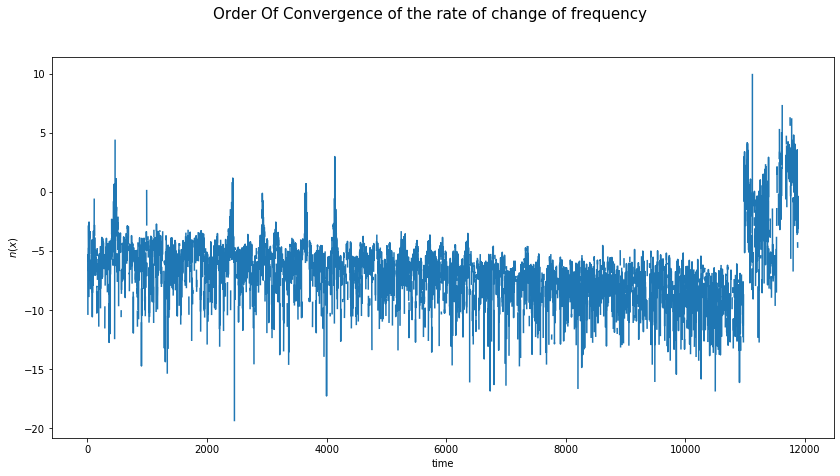

In [245]:
#order of convergence of $\dot{\omega}$
figure(figsize=(14,7))

ddc1=(phi[2:]+phi[:-2]-2.0*phi[1:-1])/(h1*h1)
ddc1=ddc1[3::4]
ddc2=(phi2[2:]+phi2[:-2]-2.0*phi2[1:-1])/(h2*h2)
ddc2=ddc2[1::2]
ddc3=(phi3[2:]+phi3[:-2]-2.0*phi3[1:-1])/(h3*h3)
ddnc = log2((ddc3 - ddc2)/(ddc2 - ddc1[:-1]))

plot(time4[:-1],ddnc,label='dw/dt')
suptitle('Order Of Convergence of the rate of change of frequency',fontsize=15)
xlabel('time')
ylabel('$n(x)$')

# Extrapolation of $\omega (t)$ and $\dot{\omega} (t)$ to next order using estimates of two different time resolutions

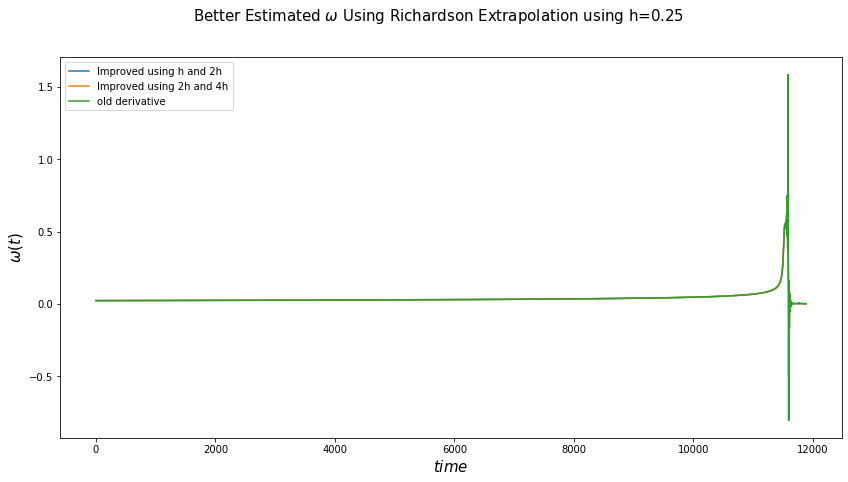

In [242]:
#for $\omega(t)$
w1=fc(phi,h1)[1::2]
w2=fc(phi2,2*h1)
w4=fc(phi4,4*h1)

df_better_h_2h=(8*w1[:-1]-w2)/7
df_better_2h_4h=(8*w4-w2[1::2])/7

figure(figsize=(14,7))
plot(time2[1:-1],df_better_h_2h,label='Improved using h and 2h')
plot(time4[:-1],df_better_2h_4h,label='Improved using 2h and 4h')
plot(t[1:-1],fc(phi,h1),label='old derivative')

xlabel('$time$',fontsize=15)
ylabel('$\omega (t)$',fontsize=15)
suptitle('Better Estimated $\omega$ Using Richardson Extrapolation using h=0.25', fontsize=15)
legend()
show()


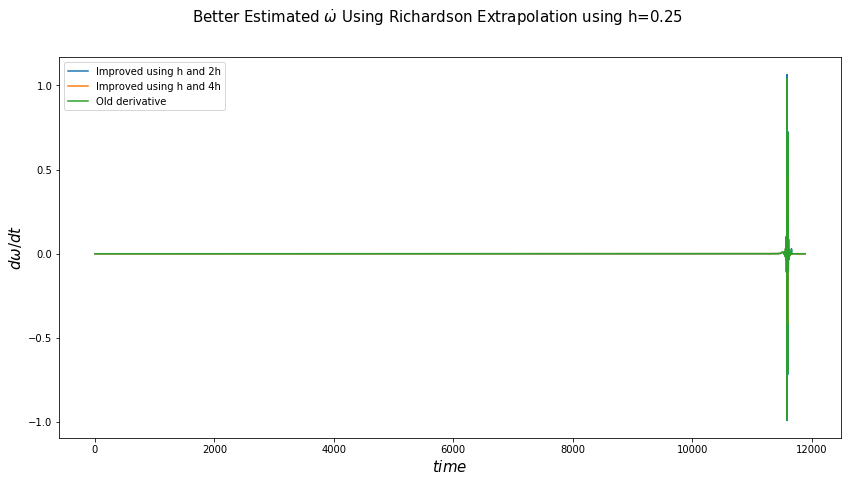

In [243]:
#for $\dot{\omega} (t)$
dw_better_h_2h=(8*ddc1[:-1]-ddc2)/7
dw_better_2h_4h=(8*ddc3-ddc2)/7

figure(figsize=(14,7))
plot(time4[1:],dw_better_h_2h,label='Improved using h and 2h')
plot(time4[1:],dw_better_2h_4h,label='Improved using h and 4h')
plot(time4,ddc1,label='Old derivative')

xlabel('$time$',fontsize=15)
ylabel('$d\omega/dt$',fontsize=15)
suptitle('Better Estimated $\dot{\omega}$ Using Richardson Extrapolation using h=0.25', fontsize=15)
legend()
show()